In [1]:
!pip install transformers datasets torch jieba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (

In [2]:
!pip install rouge-score
!pip install googletrans

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=2d5d2bf310eb74911517c6325c06024d5a432fd83ba5bc5b012e3b60ef0c785a
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-

In [4]:

from sklearn.model_selection import train_test_split
import jieba
import re
import random
import pandas as pd
from googletrans import Translator
from nltk.corpus import wordnet

# Load the data
file_path = 'data/train.xlsx'
data = pd.read_excel(file_path)

In [8]:
# # Initialize Google Translate API
# translator = Translator()

# def back_translate(text, src='zh-cn', tgt='en'):
#     translated = translator.translate(text, src=src, dest=tgt).text
#     back_translated = translator.translate(translated, src=tgt, dest=src).text
#     return back_translated

# def synonym_replacement(text):
#     words = text.split()
#     new_words = []
#     for word in words:
#         synonyms = wordnet.synsets(word)
#         if synonyms:
#             synonym = synonyms[0].lemmas()[0].name()
#             new_words.append(synonym)
#         else:
#             new_words.append(word)
#     return ' '.join(new_words)

# # Example augmentation function
# def augment_text(text):
#     augmented_texts = []
#     augmented_texts.append(back_translate(text))
#     augmented_texts.append(synonym_replacement(text))
#     # Add more augmentation techniques as needed
#     return augmented_texts

# # Apply augmentation to your dataset
# data_augmented = []
# for idx, row in data.iterrows():
#     original_text = row['裁判原文']
#     augmented_texts = augment_text(original_text)
#     for aug_text in augmented_texts:
#         new_row = row.copy()
#         new_row['裁判原文'] = aug_text
#         data_augmented.append(new_row)

# # Convert the augmented data to a DataFrame
# data_augmented_df = pd.DataFrame(data_augmented)

# # Combine with the original data
# combined_data = pd.concat([data, data_augmented_df], ignore_index=True)

# # Save the augmented dataset
# combined_data.to_excel('data/train_augmented.xlsx', index=False)


AttributeError: 'NoneType' object has no attribute 'group'

In [5]:
import random
import pandas as pd
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')

# Load your dataset
file_path = 'data/train.xlsx'
data = pd.read_excel(file_path)

def synonym_replacement(text):
    words = text.split()
    new_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words.append(synonym)
        else:
            new_words.append(word)
    return ' '.join(new_words)

# Example augmentation function
def augment_text(text):
    augmented_texts = []
    augmented_texts.append(synonym_replacement(text))
    # Add more augmentation techniques as needed
    return augmented_texts

# Apply augmentation to your dataset
data_augmented = []
for idx, row in data.iterrows():
    original_text = row['裁判原文']
    augmented_texts = augment_text(original_text)
    for aug_text in augmented_texts:
        new_row = row.copy()
        new_row['裁判原文'] = aug_text
        data_augmented.append(new_row)

# Convert the augmented data to a DataFrame
data_augmented_df = pd.DataFrame(data_augmented)

# Combine with the original data
combined_data = pd.concat([data, data_augmented_df], ignore_index=True)

# Save the augmented dataset
combined_data.to_excel('data/train_augmented.xlsx', index=False)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
# Load the data
file_path = 'data/train_augmented.xlsx'
data = pd.read_excel(file_path)

# Drop rows with missing values in '裁判原文' or '摘要'
data.dropna(subset=['裁判原文', '摘要'], inplace=True)


In [7]:
def clean_text(text):
    # Remove special characters and extra whitespace
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

data['裁判原文'] = data['裁判原文'].apply(clean_text)
data['摘要'] = data['摘要'].apply(clean_text)

In [8]:
import jieba
import jieba.analyse

# Load Chinese stop words
stop_words = set()
with open("data/stopwords.txt", "r", encoding="utf-8") as f:
    for line in f:
        stop_words.add(line.strip())

def remove_stop_words(text):
    words = jieba.cut(text)
    return " ".join([word for word in words if word not in stop_words])

data['裁判原文'] = data['裁判原文'].apply(remove_stop_words)
data['摘要'] = data['摘要'].apply(remove_stop_words)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.744 seconds.
DEBUG:jieba:Loading model cost 0.744 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [9]:
def normalize_text(text):
    text = text.lower()
    text = re.sub(r"\bcan't\b", "cannot", text)
    text = re.sub(r"\bwon't\b", "will not", text)
    # Add more normalization rules as needed
    return text

data['裁判原文'] = data['裁判原文'].apply(normalize_text)
data['摘要'] = data['摘要'].apply(normalize_text)

In [18]:
# def tokenize_text(text):
#     return " ".join(jieba.cut(text))

# data['裁判原文'] = data['裁判原文'].apply(tokenize_text)
# data['摘要'] = data['摘要'].apply(tokenize_text)

In [10]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

def preprocess_data(data, tokenizer, max_input_length=512, max_output_length=128):
    inputs = tokenizer(data['裁判原文'].tolist(), padding="max_length", truncation=True, max_length=max_input_length, return_tensors="pt")
    outputs = tokenizer(data['摘要'].tolist(), padding="max_length", truncation=True, max_length=max_output_length, return_tensors="pt")

    # Replace padding token id's of the labels by -100 so it's ignored by the loss
    outputs['input_ids'][outputs['input_ids'] == tokenizer.pad_token_id] = -100

    return inputs, outputs

train_inputs, train_outputs = preprocess_data(train_data, tokenizer)
val_inputs, val_outputs = preprocess_data(val_data, tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class SummarizationDataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __len__(self):
        return len(self.inputs['input_ids'])

    def __getitem__(self, idx):
        input_ids = self.inputs['input_ids'][idx]
        attention_mask = self.inputs['attention_mask'][idx]
        labels = self.outputs['input_ids'][idx]
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }

train_dataset = SummarizationDataset(train_inputs, train_outputs)
val_dataset = SummarizationDataset(val_inputs, val_outputs)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 95/95 [00:32<00:00,  2.97it/s]


Epoch 1/40, Training Loss: 6.616266687292802


100%|██████████| 24/24 [00:02<00:00, 10.55it/s]


Epoch 1/40, Validation Loss: 5.088898936907451


100%|██████████| 95/95 [00:31<00:00,  2.98it/s]


Epoch 2/40, Training Loss: 5.062917254473033


100%|██████████| 24/24 [00:02<00:00, 10.22it/s]


Epoch 2/40, Validation Loss: 4.561644583940506


100%|██████████| 95/95 [00:33<00:00,  2.87it/s]


Epoch 3/40, Training Loss: 4.451481179187172


100%|██████████| 24/24 [00:02<00:00,  9.52it/s]


Epoch 3/40, Validation Loss: 4.3018141984939575


100%|██████████| 95/95 [00:34<00:00,  2.72it/s]


Epoch 4/40, Training Loss: 4.037656864367033


100%|██████████| 24/24 [00:02<00:00,  8.85it/s]


Epoch 4/40, Validation Loss: 3.9940757354100547


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 5/40, Training Loss: 3.6965098192817285


100%|██████████| 24/24 [00:02<00:00,  9.44it/s]


Epoch 5/40, Validation Loss: 3.8365159928798676


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 6/40, Training Loss: 3.3603664071936357


100%|██████████| 24/24 [00:02<00:00,  9.08it/s]


Epoch 6/40, Validation Loss: 3.530840665102005


100%|██████████| 95/95 [00:34<00:00,  2.73it/s]


Epoch 7/40, Training Loss: 3.028466552182248


100%|██████████| 24/24 [00:02<00:00,  8.99it/s]


Epoch 7/40, Validation Loss: 3.368019769589106


100%|██████████| 95/95 [00:34<00:00,  2.73it/s]


Epoch 8/40, Training Loss: 2.7178608756316334


100%|██████████| 24/24 [00:02<00:00,  9.15it/s]


Epoch 8/40, Validation Loss: 3.1530884156624475


100%|██████████| 95/95 [00:34<00:00,  2.75it/s]


Epoch 9/40, Training Loss: 2.4178396726909437


100%|██████████| 24/24 [00:02<00:00,  9.22it/s]


Epoch 9/40, Validation Loss: 2.9582630594571433


100%|██████████| 95/95 [00:34<00:00,  2.75it/s]


Epoch 10/40, Training Loss: 2.1190103800673232


100%|██████████| 24/24 [00:02<00:00,  9.21it/s]


Epoch 10/40, Validation Loss: 2.808087249596914


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 11/40, Training Loss: 1.8708279170488056


100%|██████████| 24/24 [00:02<00:00,  9.23it/s]


Epoch 11/40, Validation Loss: 2.6100375602642694


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 12/40, Training Loss: 1.6010197250466598


100%|██████████| 24/24 [00:02<00:00,  9.18it/s]


Epoch 12/40, Validation Loss: 2.3901148488124213


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 13/40, Training Loss: 1.3988476408155341


100%|██████████| 24/24 [00:02<00:00,  9.21it/s]


Epoch 13/40, Validation Loss: 2.288068870703379


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 14/40, Training Loss: 1.2104279386369805


100%|██████████| 24/24 [00:02<00:00,  9.14it/s]


Epoch 14/40, Validation Loss: 2.088594973087311


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 15/40, Training Loss: 0.9938001638964603


100%|██████████| 24/24 [00:02<00:00,  9.17it/s]


Epoch 15/40, Validation Loss: 1.917755663394928


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 16/40, Training Loss: 0.84853545050872


100%|██████████| 24/24 [00:02<00:00,  9.19it/s]


Epoch 16/40, Validation Loss: 1.7530818184216816


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 17/40, Training Loss: 0.7326637992733404


100%|██████████| 24/24 [00:02<00:00,  9.18it/s]


Epoch 17/40, Validation Loss: 1.6556051932275295


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 18/40, Training Loss: 0.6347804216962112


100%|██████████| 24/24 [00:02<00:00,  9.20it/s]


Epoch 18/40, Validation Loss: 1.5267100892961025


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 19/40, Training Loss: 0.5564065032883694


100%|██████████| 24/24 [00:02<00:00,  9.19it/s]


Epoch 19/40, Validation Loss: 1.473010261853536


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 20/40, Training Loss: 0.48783219127278576


100%|██████████| 24/24 [00:02<00:00,  9.19it/s]


Epoch 20/40, Validation Loss: 1.4207879540820916


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 21/40, Training Loss: 0.4106536038612065


100%|██████████| 24/24 [00:02<00:00,  9.24it/s]


Epoch 21/40, Validation Loss: 1.3442124209056299


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 22/40, Training Loss: 0.35940357619210295


100%|██████████| 24/24 [00:02<00:00,  9.19it/s]


Epoch 22/40, Validation Loss: 1.3103658705949783


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 23/40, Training Loss: 0.32753508012545735


100%|██████████| 24/24 [00:02<00:00,  9.16it/s]


Epoch 23/40, Validation Loss: 1.2998452438041568


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 24/40, Training Loss: 0.2894064887181709


100%|██████████| 24/24 [00:02<00:00,  9.17it/s]


Epoch 24/40, Validation Loss: 1.2907370148847501


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 25/40, Training Loss: 0.24776524885704643


100%|██████████| 24/24 [00:02<00:00,  9.18it/s]


Epoch 25/40, Validation Loss: 1.2984770170102518


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 26/40, Training Loss: 0.22761046839387794


100%|██████████| 24/24 [00:02<00:00,  9.15it/s]


Epoch 26/40, Validation Loss: 1.2967349781344335


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 27/40, Training Loss: 0.20672071254567095


100%|██████████| 24/24 [00:02<00:00,  9.19it/s]


Epoch 27/40, Validation Loss: 1.2849792763590813


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 28/40, Training Loss: 0.19163173123409874


100%|██████████| 24/24 [00:02<00:00,  9.22it/s]


Epoch 28/40, Validation Loss: 1.3072605745401233


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 29/40, Training Loss: 0.1655671175373228


100%|██████████| 24/24 [00:02<00:00,  9.17it/s]


Epoch 29/40, Validation Loss: 1.3039751995820552


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 30/40, Training Loss: 0.16136454712403447


100%|██████████| 24/24 [00:02<00:00,  9.18it/s]


Epoch 30/40, Validation Loss: 1.3065090637343626


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 31/40, Training Loss: 0.13557147226835553


100%|██████████| 24/24 [00:02<00:00,  9.13it/s]


Epoch 31/40, Validation Loss: 1.3060538943391293


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 32/40, Training Loss: 0.12800083693705108


100%|██████████| 24/24 [00:02<00:00,  9.20it/s]


Epoch 32/40, Validation Loss: 1.315468434477225


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 33/40, Training Loss: 0.11821330428907746


100%|██████████| 24/24 [00:02<00:00,  9.19it/s]


Epoch 33/40, Validation Loss: 1.321318541537039


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 34/40, Training Loss: 0.13426777328315534


100%|██████████| 24/24 [00:02<00:00,  9.19it/s]


Epoch 34/40, Validation Loss: 1.3405821577956278


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 35/40, Training Loss: 0.12109921186378128


100%|██████████| 24/24 [00:02<00:00,  9.14it/s]


Epoch 35/40, Validation Loss: 1.342819125469153


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 36/40, Training Loss: 0.10152773392435752


100%|██████████| 24/24 [00:02<00:00,  9.18it/s]


Epoch 36/40, Validation Loss: 1.3332108049847495


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 37/40, Training Loss: 0.09814371526682455


100%|██████████| 24/24 [00:02<00:00,  9.16it/s]


Epoch 37/40, Validation Loss: 1.3438956818523973


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 38/40, Training Loss: 0.09747195667342136


100%|██████████| 24/24 [00:02<00:00,  9.18it/s]


Epoch 38/40, Validation Loss: 1.3537407277811628


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 39/40, Training Loss: 0.11188582158402392


100%|██████████| 24/24 [00:02<00:00,  9.17it/s]


Epoch 39/40, Validation Loss: 1.3392385587600681


100%|██████████| 95/95 [00:34<00:00,  2.76it/s]


Epoch 40/40, Training Loss: 0.09525222283248838


100%|██████████| 24/24 [00:02<00:00,  9.20it/s]


Epoch 40/40, Validation Loss: 1.3617514255068575


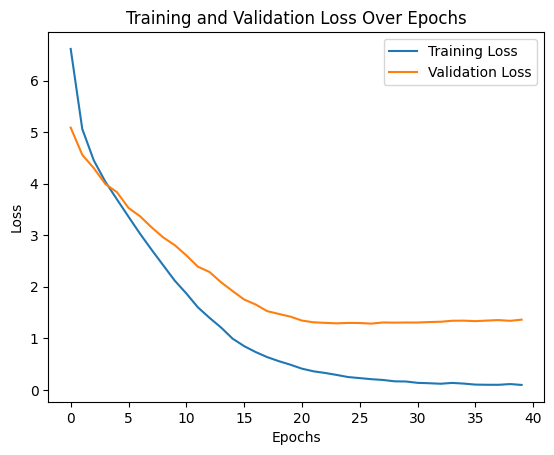

Training complete


In [13]:
from transformers import BartForConditionalGeneration, AdamW
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt

# Initialize the model, optimizer, and other variables
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
model.to('cuda')
optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 40

# Lists to store the training and validation losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to('cuda')
        attention_mask = batch['attention_mask'].to('cuda')
        labels = batch['labels'].to('cuda')

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_train_loss}")

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to('cuda')
            attention_mask = batch['attention_mask'].to('cuda')
            labels = batch['labels'].to('cuda')

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss}")

# Plotting the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

print("Training complete")

In [14]:
from rouge_score import rouge_scorer
def evaluate_rouge(model, dataloader, tokenizer):
    model.eval()
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    total_scores = {"rouge1": 0, "rouge2": 0, "rougeL": 0}
    num_samples = 0

    with torch.no_grad():
        for batch in tqdm(dataloader):
            input_ids = batch['input_ids'].to('cuda')
            attention_mask = batch['attention_mask'].to('cuda')

            generated_ids = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=128)
            generated_texts = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
            reference_texts = tokenizer.batch_decode(batch['labels'], skip_special_tokens=True)

            for gt, rt in zip(generated_texts, reference_texts):
                scores = scorer.score(rt, gt)
                for key in scores:
                    total_scores[key] += scores[key].fmeasure
                num_samples += 1

    for key in total_scores:
        total_scores[key] /= num_samples

    return total_scores

rouge_scores = evaluate_rouge(model, val_loader, tokenizer)
print("ROUGE scores:", rouge_scores)

100%|██████████| 24/24 [00:45<00:00,  1.88s/it]

ROUGE scores: {'rouge1': 0.39505654764468306, 'rouge2': 0.23681407723150014, 'rougeL': 0.38042824819465176}
